In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'R:\\Daniel Santana\\Macro\\Scrapfipe\\scrapfipe'



In [66]:
dates = ['fev-25',
         'jan-25',
         'dez-24',
         'nov-24',
         'out-24',
         'set-24',
         'ago-24',
         'jul-24',
         'jun-24',
         'mai-24']

dfs = []


In [67]:
for date in dates:
    new_path = file_path + ' ' + date + '.xlsx'
    dfs.append(pd.read_excel(new_path))

In [68]:
relevant_year = 2021
max_year = 2024

for i in range(len(dfs)):
    dfs[i] = dfs[i][dfs[i]['AnoModelo'] >= relevant_year]
    dfs[i] = dfs[i].reset_index(drop = True)
    dfs[i] = dfs[i][dfs[i]['AnoModelo'] <= max_year] 
    dfs[i] = dfs[i].reset_index(drop = True)


In [69]:
relevant_price = 300000

for i in range(len(dfs)):
    dfs[i]['Valor'] = dfs[i]['Valor'].str.replace('R$', '', regex=False)
    dfs[i]['Valor'] = dfs[i]['Valor'].str.replace(' ', '', regex=False)
    dfs[i]['Valor'] = dfs[i]['Valor'].str.replace('.', '', regex=False)
    dfs[i]['Valor'] = dfs[i]['Valor'].str.replace(',', '.', regex=False)
    dfs[i]['Valor'] = pd.to_numeric(dfs[i]['Valor'], errors='coerce')
    dfs[i] = dfs[i][dfs[i]['Valor'] <= relevant_price]
    dfs[i] = dfs[i].reset_index(drop=True)


In [70]:
minimum_price = 40000

for i in range(len(dfs)):
    dfs[i] = dfs[i][dfs[i]['Valor'] >= minimum_price]


In [71]:
weights = [0.34325 , 0.34067 , 0.22117, 0.0655]
endprices = [75675 , 104660 , 133645, 162630]
means = []
carvalues = []

for j in range(len(dfs)):

    carvalue = 0
    means = []

    for i in range(len(endprices)) :
        
        intermediariedf = dfs[j][dfs[j]['Valor'] <= endprices[i]]
        means.append(intermediariedf['Valor'].mean())

    for i in range(len(means)):
        carvalue += means[i]*weights[i]
    carvalues.append(carvalue)


In [72]:
dates_adjuted = dates[::-1]
carvalues_adjusted = carvalues[::-1]

adjusted_df = pd.DataFrame({
    'Dates' : dates_adjuted,
    'Localiza Implied Prices' : carvalues_adjusted
})


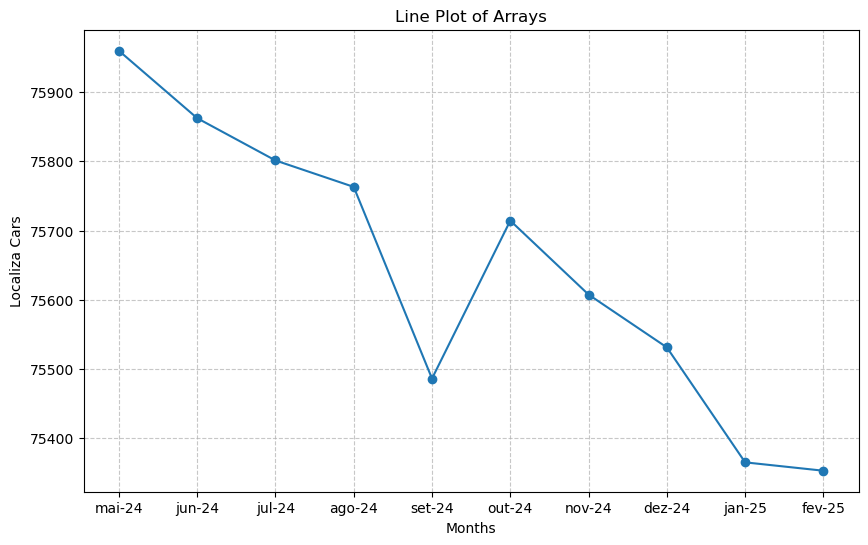

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_df['Dates'], adjusted_df['Localiza Implied Prices'], marker='o')
plt.title('Line Plot of Arrays')
plt.xlabel('Months')
plt.ylabel('Localiza Cars')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
annualized_depreciation = []


for i in range(len(dates[1:])):
    annual_depreciation = (carvalues_adjusted[i+1] - carvalues_adjusted[i]) * 12
    annualized_depreciation.append(annual_depreciation)
    

depreciation_df = pd.DataFrame({
    'Dates' : dates_adjuted[1:],
    'Annual Depreciation' : annualized_depreciation
})

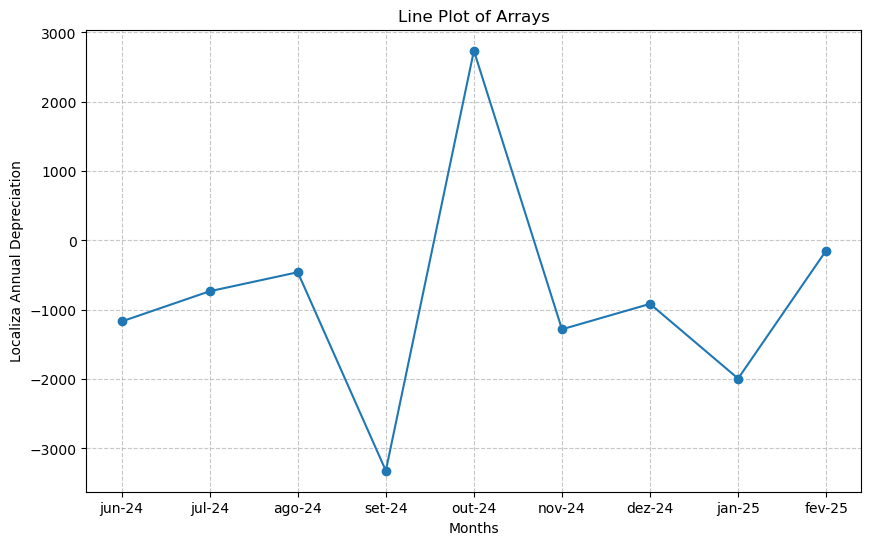

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(depreciation_df['Dates'], depreciation_df['Annual Depreciation'], marker='o')
plt.title('Line Plot of Arrays')
plt.xlabel('Months')
plt.ylabel('Localiza Annual Depreciation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()